In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the glass data
data = pd.read_csv(r'C:\Users\Sooraj\Downloads\glass.csv')

In [3]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [5]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


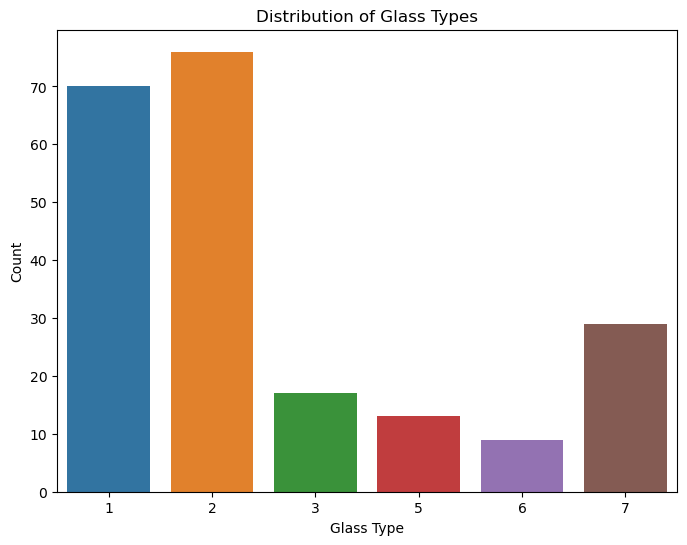

In [6]:
# Distribution of Target Variable
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Type')
plt.title('Distribution of Glass Types')
plt.xlabel('Glass Type')
plt.ylabel('Count')
plt.show()

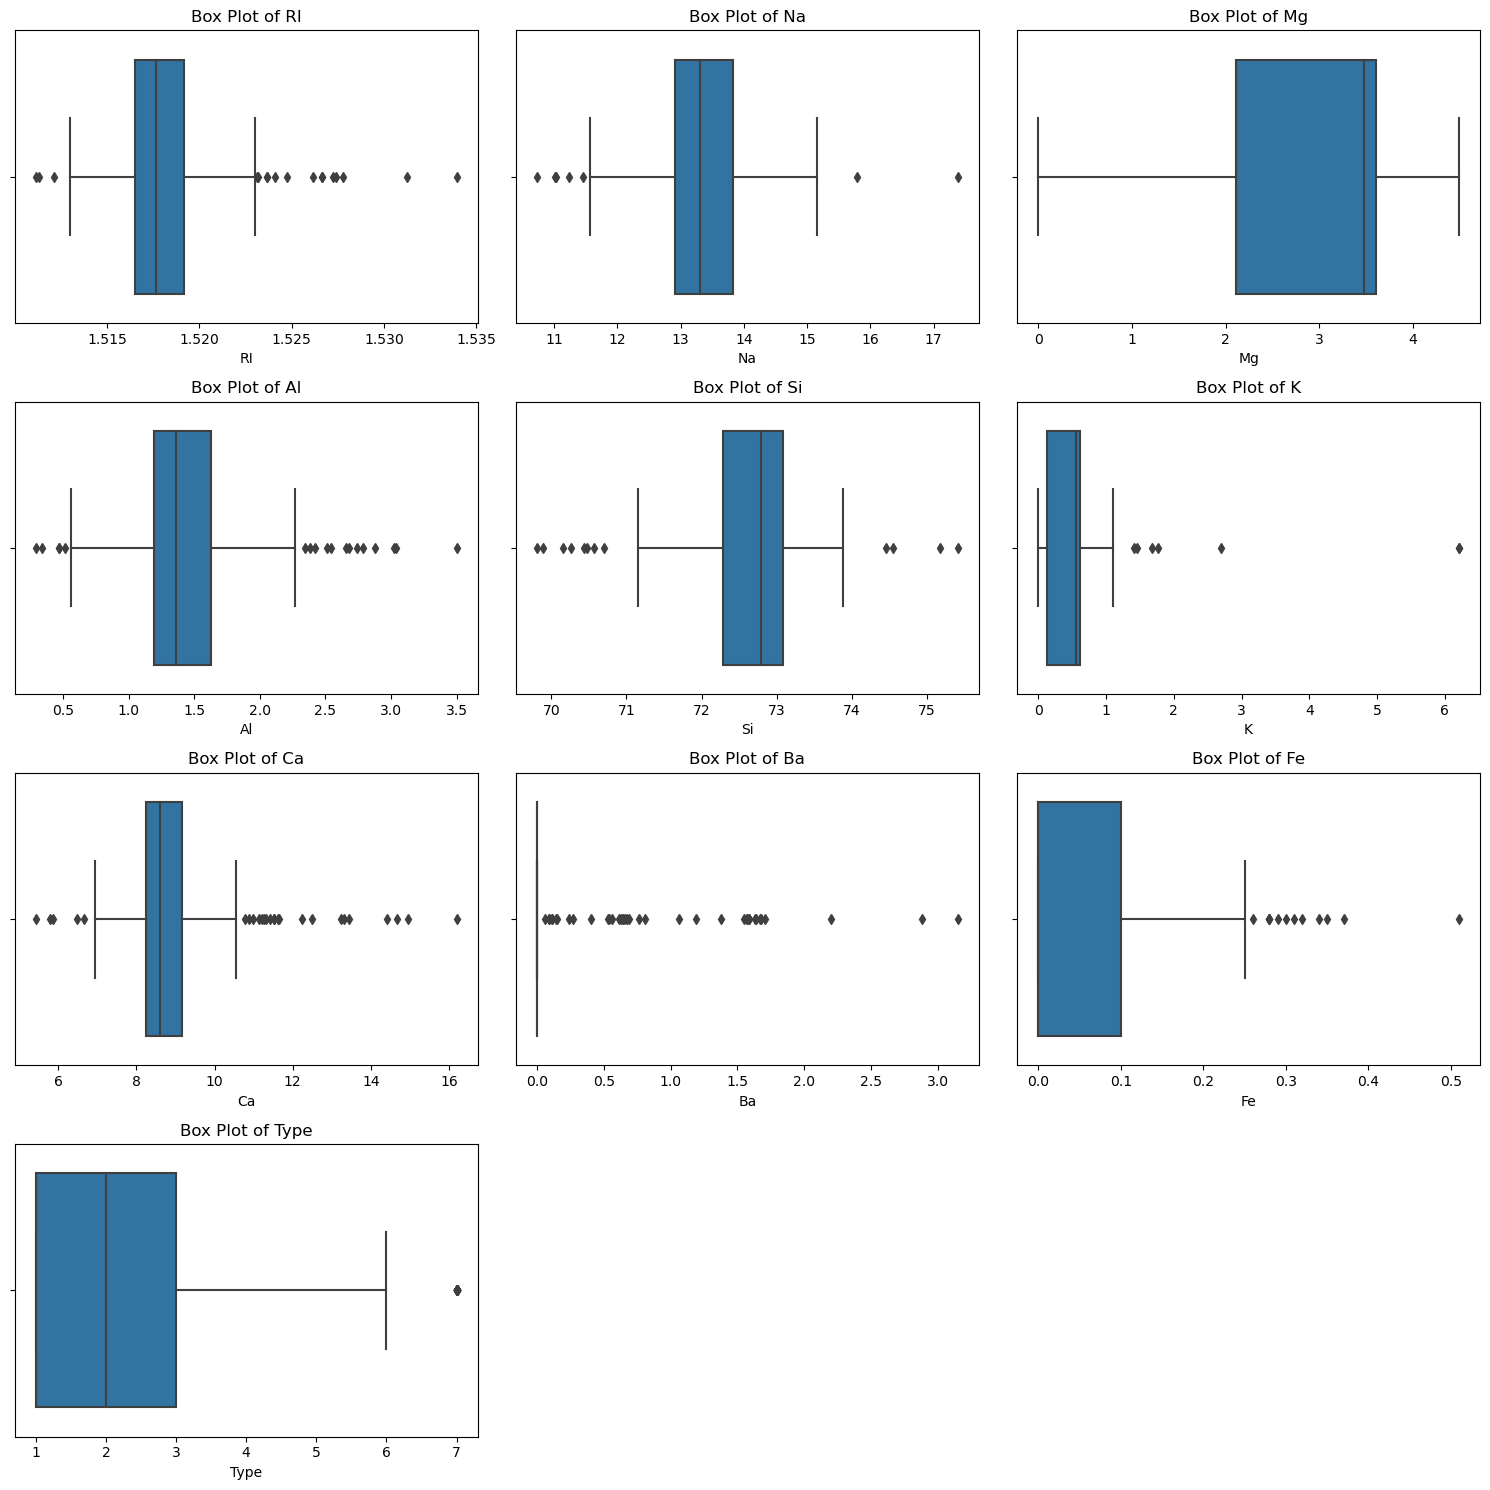

In [7]:
plt.figure(figsize=(15, 15))
for i, col in enumerate(data.select_dtypes(include=['float64', 'int64'])):
    plt.subplot(4, 3, i+1)
    sns.boxplot(x=data[col])
    plt.title(f'Box Plot of {col}')
    plt.tight_layout()
plt.show()

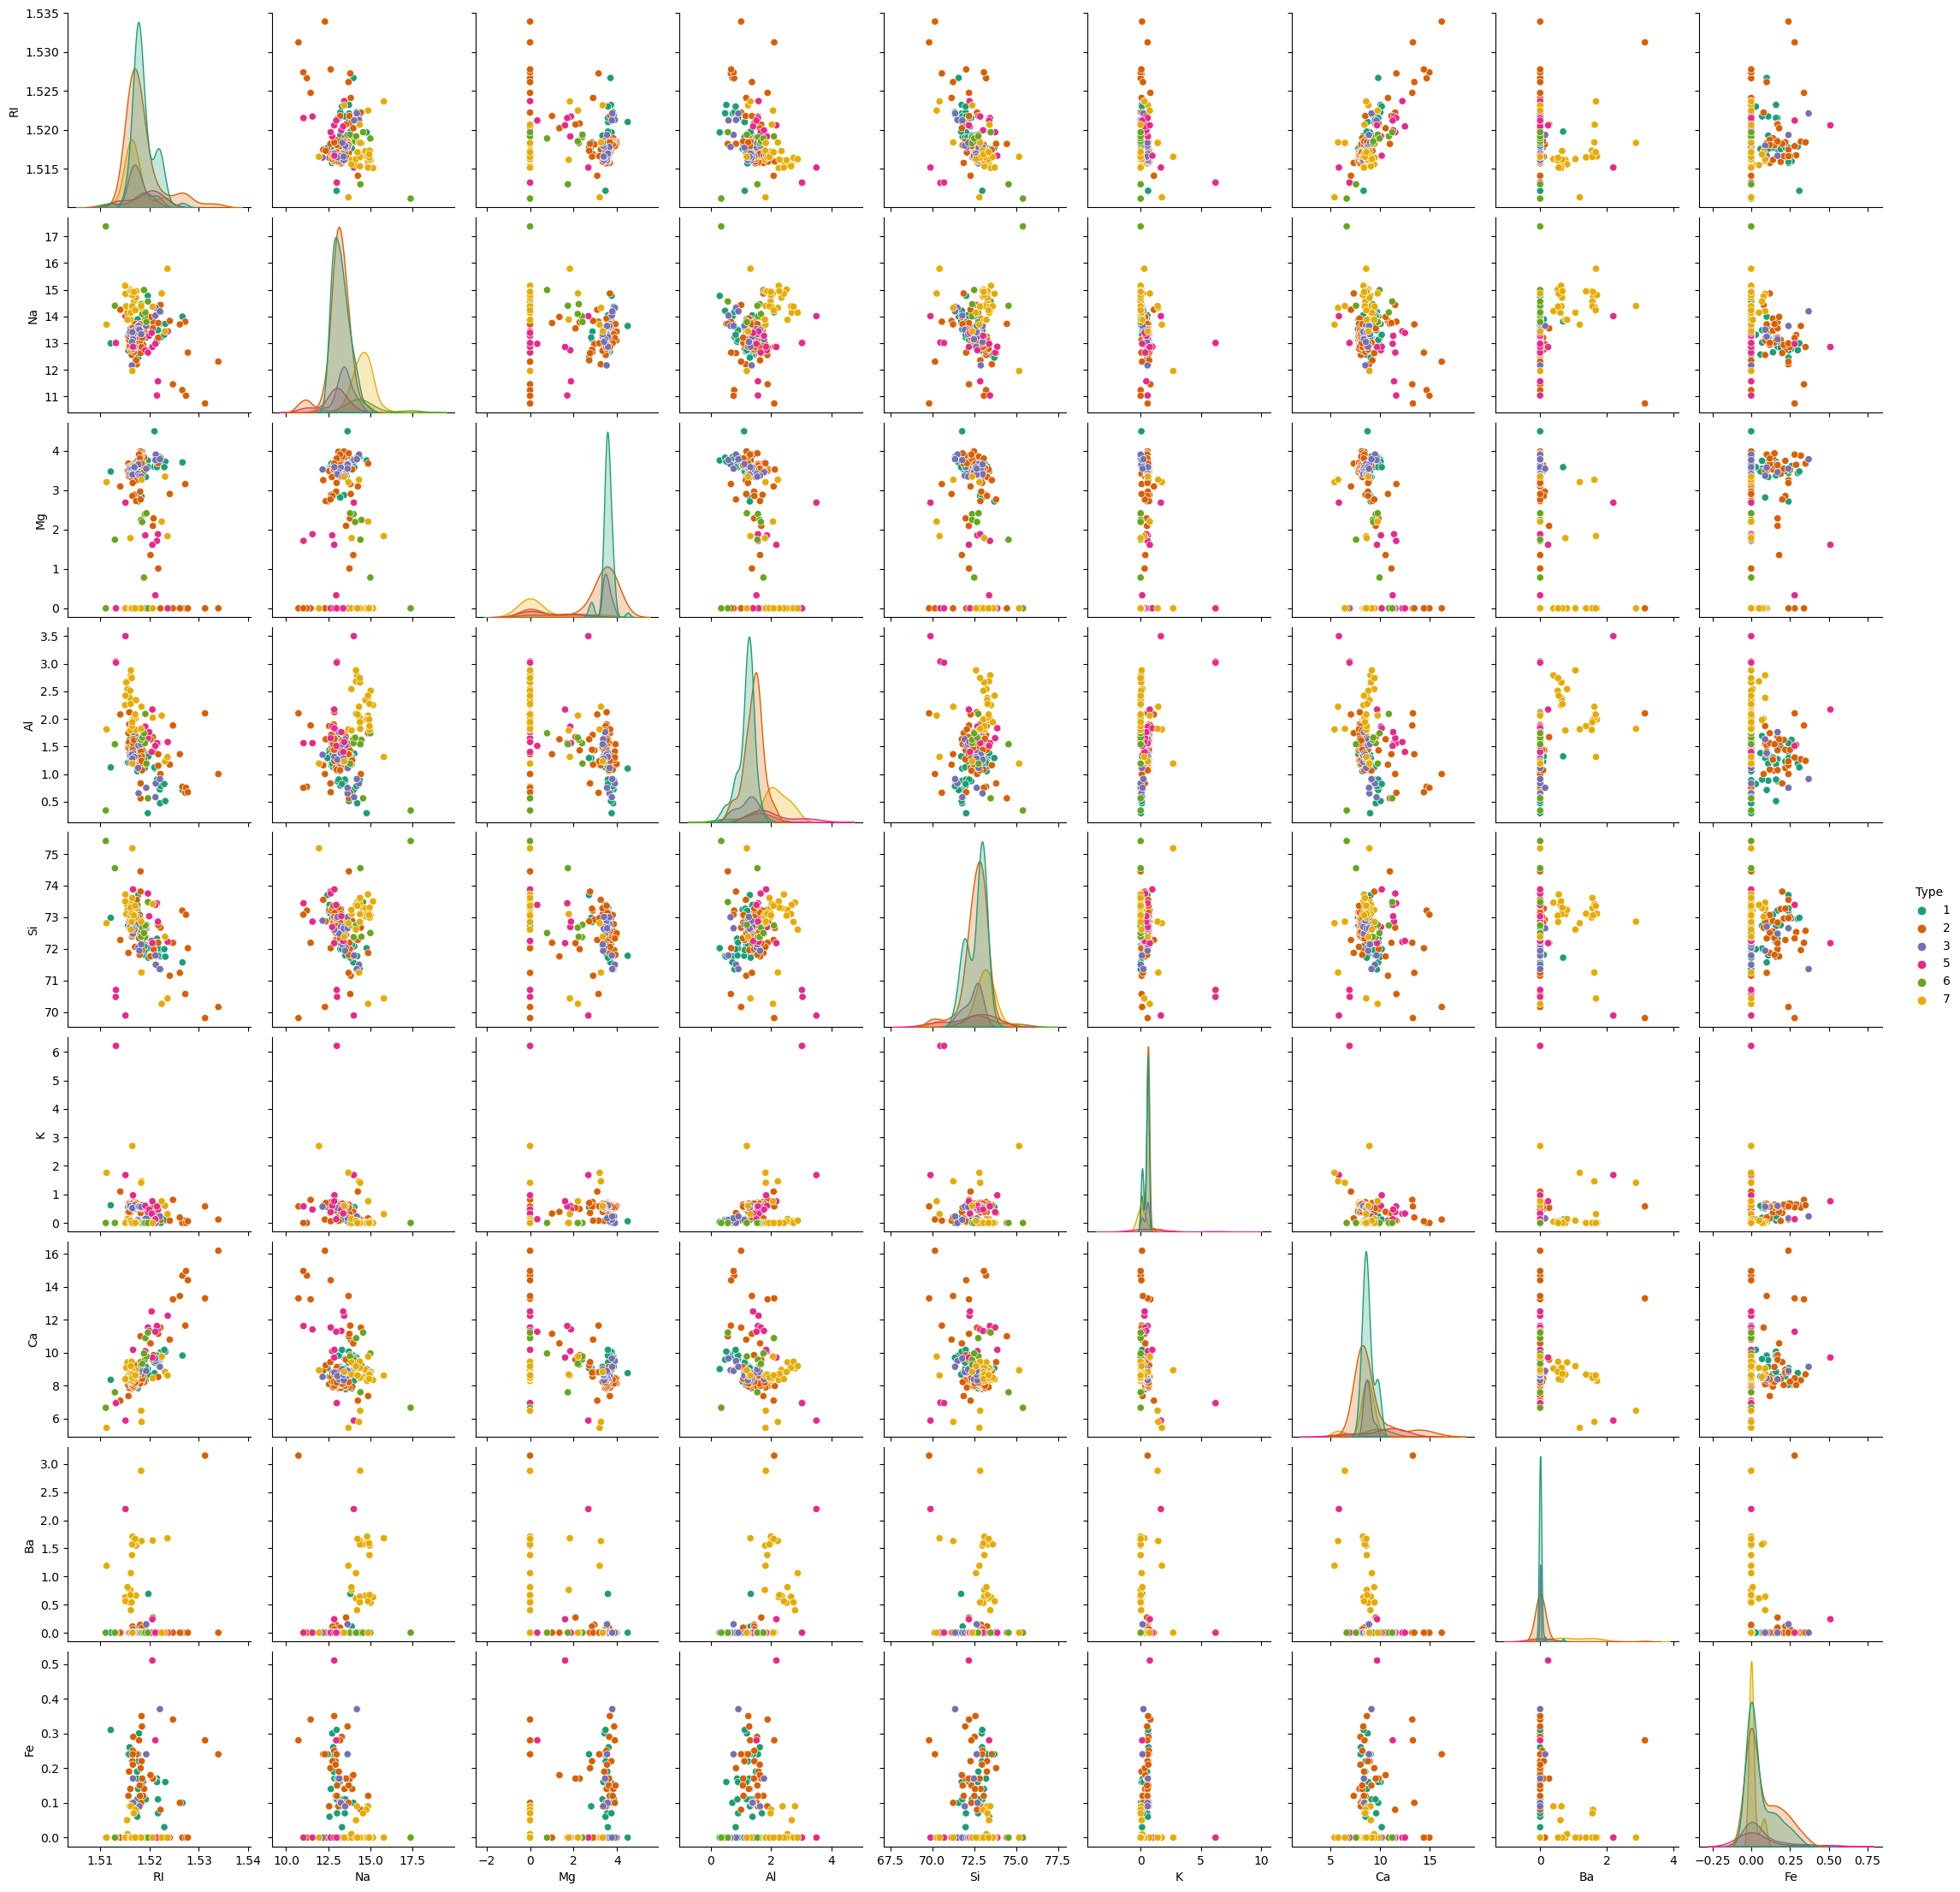

In [8]:
# Pairwise Scatter Plot
sns.pairplot(data, hue='Type', palette='Dark2')
plt.show()

In [9]:
# Split the data into features (X) and target variable (y)
X = data.drop('Type', axis=1)
y = data['Type']

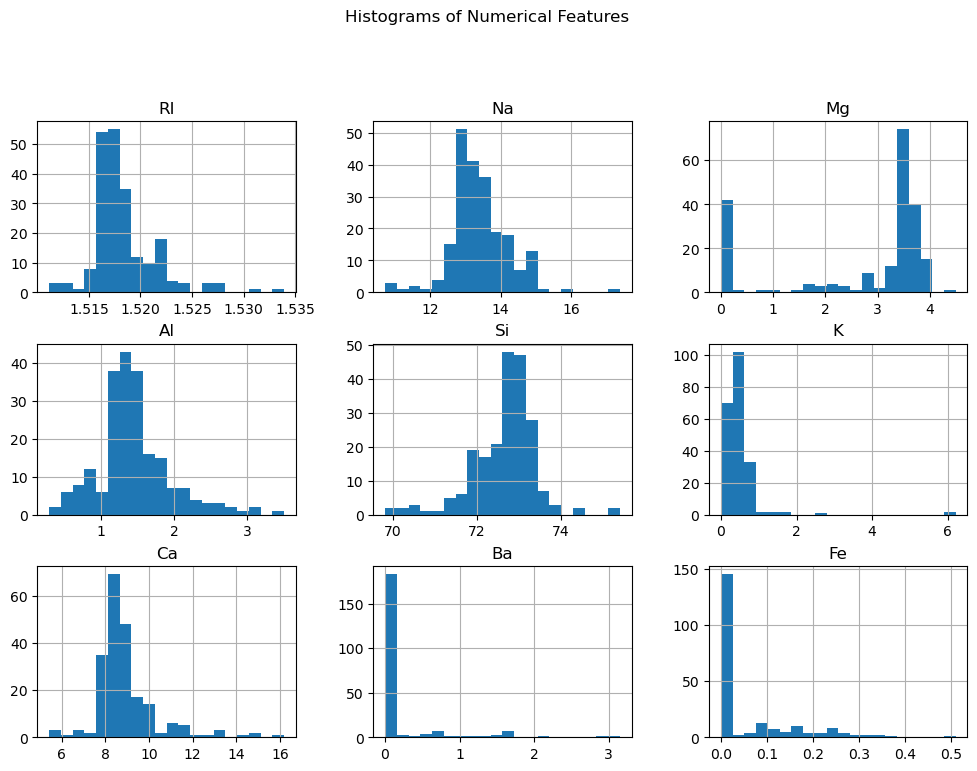

In [10]:
# Histograms of Numerical Features
X_numeric = X.select_dtypes(include='number')
X_numeric.hist(figsize=(12, 8), bins=20)
plt.suptitle('Histograms of Numerical Features', y=1.02)
plt.show()

In [11]:
# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [13]:
# KNN Classification
model = KNeighborsClassifier()

In [14]:
# Fit the model to the training data
model.fit(X_train, y_train)

KNeighborsClassifier()

In [15]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [16]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.6976744186046512


In [17]:
# Display classification report and confusion matrix
print('Classification Report:')
print(classification_report(y_test, y_pred))

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           1       0.62      0.91      0.74        11
           2       0.62      0.57      0.59        14
           3       0.00      0.00      0.00         3
           5       0.50      0.25      0.33         4
           6       1.00      1.00      1.00         3
           7       0.89      1.00      0.94         8

    accuracy                           0.70        43
   macro avg       0.60      0.62      0.60        43
weighted avg       0.64      0.70      0.66        43

Confusion Matrix:
[[10  1  0  0  0  0]
 [ 5  8  0  1  0  0]
 [ 1  2  0  0  0  0]
 [ 0  2  0  1  0  1]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  8]]


In [18]:
# Cross-Validation for Hyperparameter Tuning
num_neighbors = np.array(range(1, 40))
param_grid = dict(n_neighbors=num_neighbors)

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5)
grid.fit(X_scaled, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])},
             scoring='accuracy')

In [19]:
# Display the best parameters and corresponding accuracy
print("\nGrid Search for Hyperparameter Tuning:")
print("Best Score:", grid.best_score_)
print("Best Parameters:", grid.best_params_)


Grid Search for Hyperparameter Tuning:
Best Score: 0.6729789590254706
Best Parameters: {'n_neighbors': 2}


In [20]:
# Visualizing the CV results
import matplotlib.pyplot as plt

In [21]:
# choose k between 1 to 40
k_range = range(1, 41)
k_scores = []

In [22]:
# use iteration to calculate different k in models, then return the average accuracy based on the cross-validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_scaled, y, cv=5)
    k_scores.append(scores.mean())

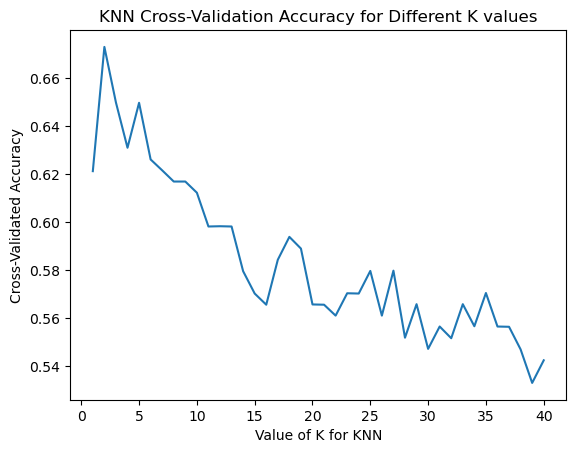

In [23]:
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('KNN Cross-Validation Accuracy for Different K values')
plt.show()